<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" > Projet : Analyse de sentiments </h1> 
<hr style="border-width:2px;border-color:#75DFC1">

Description du projet
Analyser les sentiments d’une critique de films peut donner un aperçu sur l’impact du film sur la personne (positif/négatif).
L’objectif est d’implémenter un modèle de Deep learning qui réalise l’analyse de sentiments
Jeu de données disponible ici: 
https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

<h2>1 - Explore and visualize data</h2>

<h3>Import library</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk import FreqDist
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.metrics import roc_curve, auc
import tensorflow as tf

C:\Users\J0392667\.conda\envs\myenv1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\J0392667\.conda\envs\myenv1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\J0392667\.conda\envs\myenv1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\J0392667\.conda\envs\myenv1\lib\site-packages\tensorflow\pyth

<h3>Import data from CSV</h3>

In [2]:
df = pd.read_csv('C:/Local/GitHub/ml-datascientest/Project/IMDB Dataset.csv')
print('Shape: ', df.shape)

df.head()

Shape:  (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<h3>Replace sentiment as boolean</h3>

In [3]:
df.sentiment = df.sentiment.replace('positive',1)
df.sentiment = df.sentiment.replace('negative',0)

<h3>verification de l'équilibrage</h3>

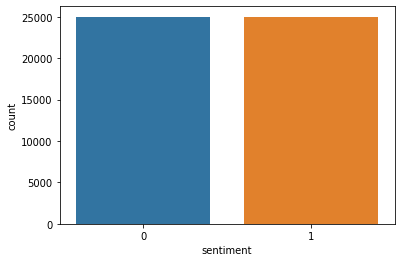

In [4]:
sns.countplot(x="sentiment", data=df);

<h3>check duplicates</h3>

In [5]:
df[df.duplicated(['review'],keep=False)].sort_values(by=['review'])

,review,sentiment
34058,"""Go Fish"" garnered Rose Troche rightly or wron...",0
47467,"""Go Fish"" garnered Rose Troche rightly or wron...",0
29956,"""Three"" is a seriously dumb shipwreck movie. M...",0
31488,"""Three"" is a seriously dumb shipwreck movie. M...",0
47527,"""Witchery"" might just be the most incoherent a...",0
...,...,...
47876,this movie sucks. did anyone notice that the e...,0
44122,"well, the writing was very sloppy, the directi...",0
23056,"well, the writing was very sloppy, the directi...",0
10163,"when I first heard about this movie, I noticed...",1


<h3>Clean duplicates</h3>

In [6]:
df = df.drop_duplicates(subset=['review'])

<h3>Print lines to check data</h3>

In [7]:
def print_lines(n, col_name = 'review'):
    
    index = np.random.randint(0, df.shape[0], n)

    for i in index:
        print('sentiment:', df['sentiment'].loc[i])
        print('review:', df[col_name].loc[i])
        print()

In [8]:
print_lines(5)

sentiment: 1
review: I'm out of words to describe the beauty of "The Cranes are Flying", but I'll try anyway to write about it. It's a powerful and delicate love story that takes its place in the Second World War. It's the classic story of lovers (Boris & Veronika) separated by the war and of what comes between them. The film's images are so gorgeous, that you'll be carried away - the film technique is in perfect unison with the emotion.<br /><br />There are few scenes that portray directly the war: A bombing - wind, lightnings, explosions - that will have important consequences in the life of the main protagonist, Veronika, who waits for the return of Boris; and there's another scene on the front, where we we will be confronted by a emotional/visual hurricane showing the images played in Boris' mind. Another scene works as the leitmotif of the film and provides its title - the cranes flying in the sky. This image stands as a the symbol for Nature and its seasons and underlines the fin

<h3>Import stop words</h3>

In [9]:
stop_words = set(stopwords.words('english'))
print(stop_words)

stop_words.update([",", ".", "?", ":", "/", "http", "https", '@', '#','<br />','br'])

{'you', "aren't", "should've", 'doesn', 'there', 'couldn', 'does', "didn't", "you've", 'against', 'didn', 'than', 'had', 'ain', 'nor', 'haven', 'don', 'being', 'between', 'for', 'just', 'once', 'their', 'after', 't', "weren't", 'hers', "doesn't", 'more', 'too', 'y', 'not', "hasn't", 'up', 'while', 'which', 'a', "hadn't", 'our', 'your', "needn't", 'hasn', 'be', 'himself', "shouldn't", 'do', "it's", 'no', 'he', 'now', 'if', 'of', 'on', 'during', 'further', 'off', 'about', "mightn't", 'through', "she's", 'she', 'ourselves', 'its', 'again', 'down', 'very', "haven't", 'at', 'can', 'mightn', "won't", 'how', 'such', 'herself', 'out', 'then', 'o', 'has', 'mustn', "wouldn't", 'ours', 'own', 'my', 'when', 'am', 'few', 'is', 'we', 'the', 'isn', 'myself', "you'd", 'wasn', 'some', 'over', 'll', 'it', 'both', 'weren', 'and', 'should', 'what', 'where', 'only', 'her', 'so', 'won', "shan't", 'shouldn', 'other', 'were', 'having', 'was', 'or', 'as', "that'll", 'are', 'they', 'by', 'yours', 'here', "could

<h3>Clean text !</h3>

In [10]:
txt_clean = []
for i in df.index:
    comment = df["review"][i].lower()
    comment = word_tokenize(comment, language='english')
    comment_clean = []
    for w in comment:
        if (w not in stop_words) and (w.isalpha() or w.isnumeric()) and len(w)>1:
            comment_clean.append(w)
    txt_clean.append(" ".join(comment_clean))

df['text_clean'] = txt_clean

print_lines(5, col_name='text_clean')

sentiment: 1
review: modern marco polo venice china come amelio taking task render us grey area middle two worlds solid colors eroded globalization collateral damages pessimistic vision europe mutual chinas view charming puzzling country dealt devoid claim learn impose opinions reality nonetheless harsh abandoned exploited children backward areas china ignore vincenzo castellitto technician steel factory one us voyage china pretext understand learn inside country progress problems live together infamous balance exactly clear vincenzo knew first time mechanical component already fixed think anyway minor aspect liu chinese girl key whole film carries back lot difficulties got strength overcome could fight little money little help realistic unbiased view facts girl refusing vincenzo money touched lot pack ca get back husband baby forced treat like stranger law protect scorns liu knew intentions benign kind far cold charity act friendship beautifully narrated way grows step step dignified 

<h3>Vizualize words frequence</h3>

In [11]:
from nltk import FreqDist

train_string = ' '.join(df['text_clean'])
splits = train_string.split() 
freq_splits = FreqDist(splits)
print('50 most common words \n', freq_splits.most_common(100), '\n')

50 most common words 
 [('movie', 84391), ('film', 76379), ('one', 51441), ('like', 38860), ('good', 28565), ('would', 26260), ('even', 24577), ('time', 23290), ('really', 22854), ('see', 22434), ('story', 22197), ('well', 18897), ('much', 18855), ('could', 18349), ('get', 18117), ('people', 17797), ('great', 17792), ('also', 17749), ('bad', 17657), ('first', 17054), ('made', 15315), ('make', 15209), ('way', 14997), ('movies', 14697), ('think', 14163), ('characters', 14047), ('watch', 13515), ('character', 13490), ('films', 13368), ('many', 13311), ('seen', 13012), ('two', 12945), ('never', 12787), ('love', 12543), ('acting', 12481), ('plot', 12370), ('best', 12301), ('know', 12230), ('little', 12213), ('show', 12165), ('life', 11823), ('ever', 11618), ('better', 11043), ('man', 10961), ('still', 10711), ('say', 10616), ('end', 10592), ('scene', 10572), ('scenes', 10140), ('something', 9831), ('go', 9610), ('back', 9224), ('thing', 8942), ('watching', 8938), ('real', 8919), ('actors', 

In [12]:
def visualize_freq(df, n=30):
    
    tokens = []
    for i in df.index:
        t = df["text_clean"][i].split()
        tokens = tokens + t
    
    freq = FreqDist(tokens)
    top_words = sorted(freq.items(), key=lambda x: x[1], reverse=True)[:n]  # descending order

    plt.figure(figsize=(10, 5))
    freq.plot(n, cumulative=False)
    plt.show()

    return top_words

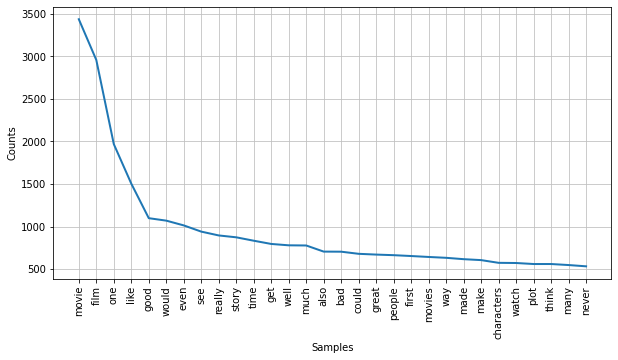

In [13]:
top_words = visualize_freq(df.head(2000))

<h3>Visualize through Sentiment :</h3>

sentiment=negative: 


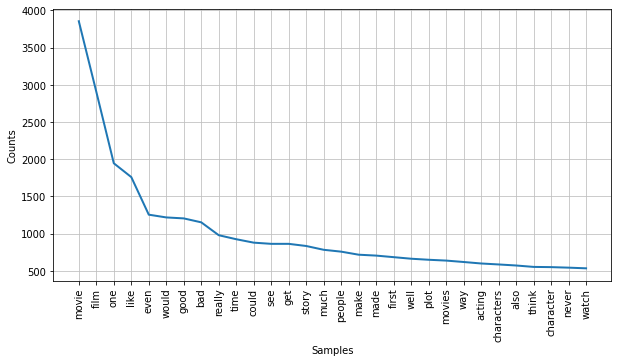

sentiment=positive: 


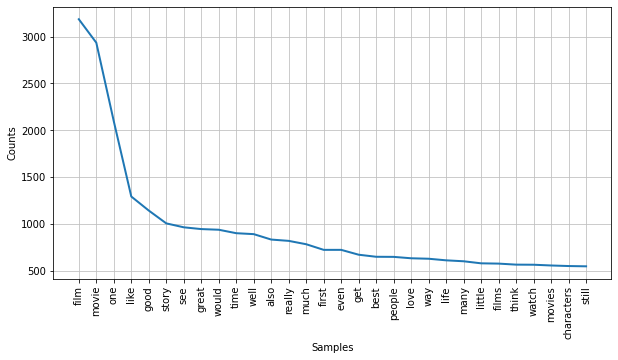

In [14]:
print("sentiment=negative: ")
top_words_0 = visualize_freq(df[df['sentiment']==0].head(2000))
print("sentiment=positive: ")
top_words_1 = visualize_freq(df[df['sentiment']==1].head(2000))

<h3>Verify comment lenght</h3>

C:\Users\J0392667\.conda\envs\myenv1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\J0392667\.conda\envs\myenv1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


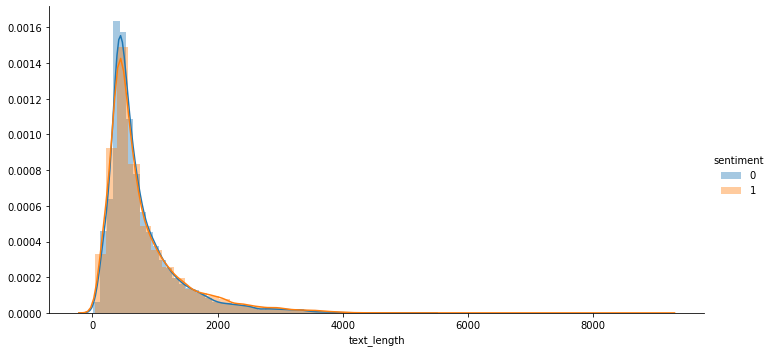

In [15]:
df["text_length"] = df["text_clean"].apply(lambda x: len(x))

g = sns.FacetGrid(data = df, hue ="sentiment",height=5, aspect=2)
g.map(sns.distplot, "text_length")
g.add_legend();

<h3>Stemming</h3>

In [16]:
import nltk
from nltk.stem.snowball import EnglishStemmer

def stim(text):
    text = word_tokenize(text) 
    stemmer = EnglishStemmer()
    stemmerized = ' '.join([stemmer.stem(word) for word in text])
    return stemmerized

df["text_clean"] = df["text_clean"].apply(stim)

sentiment=negative: 


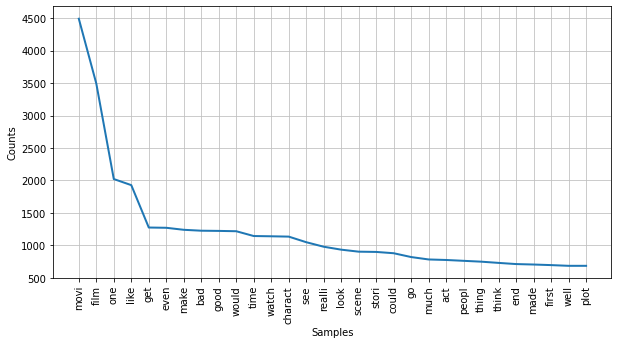

sentiment=positive: 


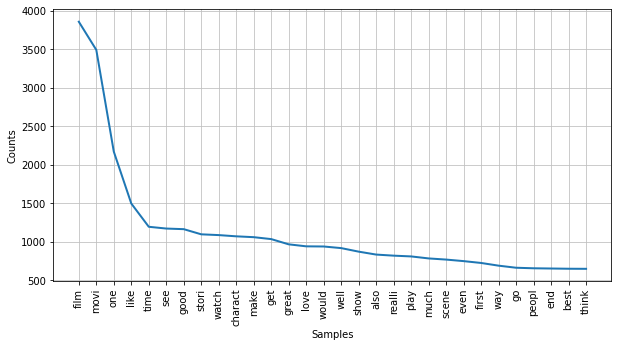

In [17]:
print("sentiment=negative: ")
top_words_0 = visualize_freq(df[df['sentiment']==0].head(2000))
print("sentiment=positive: ")
top_words_1 = visualize_freq(df[df['sentiment']==1].head(2000))

<h3>See the 50 most command words</h3>

In [18]:
from nltk import FreqDist

train_string = ' '.join(df['text_clean'])
splits = train_string.split() 
freq_splits = FreqDist(splits)
print('50 most common words \n', freq_splits.most_common(50), '\n')

50 most common words 
 [('movi', 99089), ('film', 92079), ('one', 53223), ('like', 43819), ('time', 29832), ('good', 28992), ('make', 28447), ('see', 27557), ('get', 27550), ('charact', 27540), ('watch', 27141), ('would', 26260), ('even', 25058), ('stori', 24268), ('realli', 22854), ('scene', 20713), ('well', 19412), ('show', 19274), ('look', 19166), ('bad', 18943), ('much', 18856), ('could', 18349), ('great', 18337), ('end', 18223), ('peopl', 17986), ('also', 17749), ('go', 17651), ('love', 17646), ('think', 17289), ('first', 17222), ('play', 16969), ('act', 16799), ('way', 16516), ('thing', 16118), ('made', 15316), ('know', 14868), ('say', 14780), ('seem', 14718), ('mani', 13350), ('work', 13143), ('plot', 13072), ('want', 13025), ('seen', 13014), ('actor', 13006), ('two', 12945), ('come', 12914), ('take', 12869), ('never', 12787), ('tri', 12326), ('best', 12317)] 



<h3>See it in a worldcloud</h3>

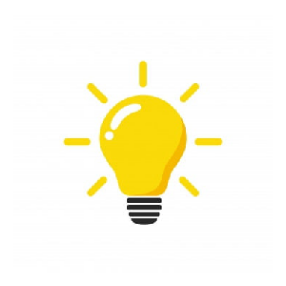

In [19]:
from PIL import Image

img_name = "C:\Local\GitHub\ml-datascientest\Project\light_bulb.jpg"
img = Image.open(img_name)

# displaying the image
plt.figure(figsize= (10,5))
plt.imshow(img)
plt.axis('off');

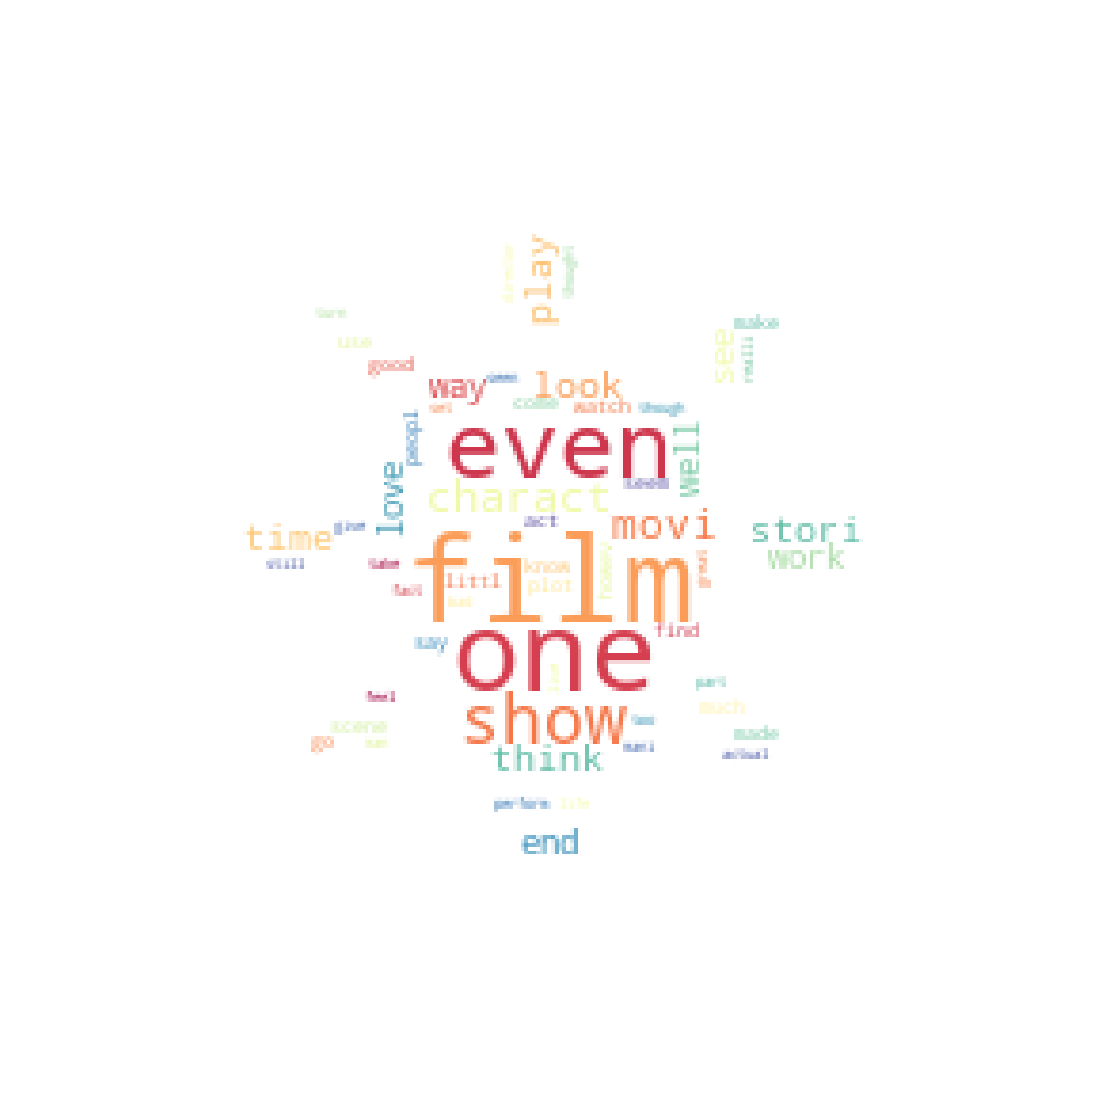

In [21]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=400, mask = np.array(img), colormap=plt.cm.Spectral, max_font_size=50, random_state=42)

txt_clean = " ".join(df['text_clean'])
wc.generate(txt_clean)

plt.figure(figsize= (30,20))
plt.imshow(wc)
plt.axis('off');

<h2>2 - define and implement</h2>

In [22]:
from sklearn.model_selection import train_test_split

text, y = df['text_clean'], df['sentiment']
text_train, text_test, y_train, y_test = train_test_split(text, y, test_size=0.20, random_state=42)

<h3>Bag of words</h3>

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

tokens_train = vectorizer.fit_transform(text_train)
print('longueur vocabulaire:', len(vectorizer.vocabulary_))
print({k: vectorizer.vocabulary_[k] for k in list(vectorizer.vocabulary_)[:10]})

longueur vocabulaire: 61054
{'realli': 43810, 'like': 31091, 'movi': 35933, 'empor': 16909, 'new': 37140, 'groov': 22496, 'watch': 58595, 'come': 11035, 'home': 24809, 'see': 47415}


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train = tokens_train
rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train, y_train)
X_test = vectorizer.transform(text_test)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79      4939
           1       0.76      0.88      0.82      4978

    accuracy                           0.80      9917
   macro avg       0.81      0.80      0.80      9917
weighted avg       0.81      0.80      0.80      9917



In [25]:
def plot_ROC(X_test, y_test, model):

    # compute the probabilities
    probs = model.predict_proba(X_test)

    # ROC curve
    fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)

    # compute AUC
    roc_auc = auc(fpr, tpr)

    # Display the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, lw=2, label='RF Model (auc = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], lw=2, linestyle='--', label='Model (auc = 0.5)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

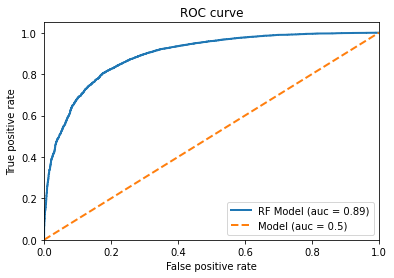

In [26]:
plot_ROC(X_test, y_test, rf)

<h3>Term Frequency-Inverse Document Frequency</h3>

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()

X_train = tf_idf.fit_transform(text_train)
voc = tf_idf.vocabulary_
print('Taille Vocabulaire: ', len(voc))

# Affichage d'un échantillon
df_s = pd.DataFrame(X_train[0].T.todense(), index=tf_idf.get_feature_names(), columns=["TF-IDF"])
df_s = df_s.sort_values('TF-IDF', ascending=False)
df_s.head(5)

Taille Vocabulaire:  61054


,TF-IDF
llama,0.458626
empor,0.440399
groov,0.344193
cartoon,0.226702
line,0.218174


In [28]:
rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train, y_train)

X_test = tf_idf.transform(text_test)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78      4939
           1       0.76      0.88      0.81      4978

    accuracy                           0.80      9917
   macro avg       0.81      0.80      0.80      9917
weighted avg       0.81      0.80      0.80      9917



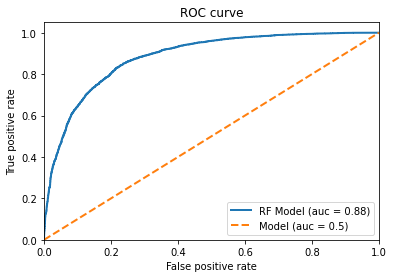

In [29]:
plot_ROC(X_test, y_test, rf)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train = tokens_train
lg = LogisticRegression(max_iter=100)
lg.fit(X_train,y_train)

X_test = vectorizer.transform(text_test)
y_pred = lg.predict(X_test)

print(classification_report(y_test, y_pred))

C:\Users\J0392667\.conda\envs\myenv1\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4939
           1       0.87      0.88      0.88      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



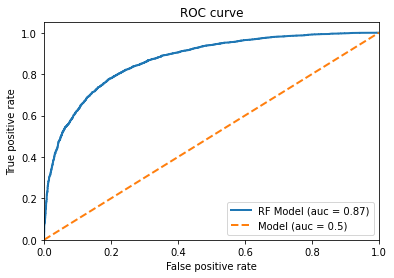

In [31]:
plot_ROC(X_test, y_test, rf)

In [32]:
df.sample(n=5, random_state = 42)

,review,sentiment,text_clean,text_length
29171,"""Soul Plane"" is a horrible attempt at comedy t...",0,soul plane horribl attempt comedi appeal peopl...,527
43589,Guest from the Future tells a fascinating stor...,1,guest futur tell fascin stori time travel frie...,1086
38712,"""National Treasure"" (2004) is a thoroughly mis...",0,nation treasur 2004 thorough misguid plot enta...,2436
16045,"OK. First said, I just wanted to check whether...",0,first said want check whether movi averag rate...,2231
5248,"I haven't always been a fan, but the show grew...",1,alway fan show grew season start see rich show...,2604


In [105]:
text_train

7837     realli like movi empor new groov watch like co...
4814     decid watch movi note scariest movi ever expec...
35458    hard say go ladi shanghai film could without s...
3446     adventur best mean worst agre statement bad co...
24478    around late 1970 anim bluth frustrat output co...
                               ...                        
11304    dictat thin experi life industri cash sofia co...
45059    classic case someth never gloria singl mother ...
38405    spoiler spoiler saw movi last night screen sta...
860      product quit surpris absolut love obscur earli...
15838    real eye candi world made float island fli anc...
Name: text_clean, Length: 39665, dtype: object

In [90]:
vectorizer_train = CountVectorizer()
tokens_train = vectorizer_train.fit_transform(text_train)
vectorizer_test = CountVectorizer()
tokens_test = vectorizer_test.fit_transform(text_test)
print('longueur vocabulaire train:', len(vectorizer_train.vocabulary_))
print('longueur vocabulaire test:', len(vectorizer_test.vocabulary_))
print({k: vectorizer.vocabulary_[k] for k in list(vectorizer.vocabulary_)[:10]})



longueur vocabulaire train: 61054
longueur vocabulaire test: 33975
{'soul': 27939, 'plane': 22924, 'horribl': 14117, 'attempt': 2028, 'comedi': 6172, 'appeal': 1602, 'peopl': 22446, 'thick': 30010, 'skull': 27404, 'bloodshot': 3466}


In [103]:
tokens_train.shape

(39665, 61054)

<h3>Deep model RNN</h3>

In [106]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)
tokenizer.fit_on_texts(text_train)

In [107]:
X_train = tokenizer.texts_to_sequences(text_train)
X_test = tokenizer.texts_to_sequences(text_test)

In [108]:
maxlen = 500
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen, padding='post')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen, padding='post')

In [126]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN

top_words = 10000;
model = Sequential()
model.add(Embedding(top_words, 32, input_length=len(X_train[0])))

model.add(SimpleRNN(16,input_shape = (10000,500), return_sequences=False, activation="relu"))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 500, 32)           320000    
_________________________________________________________________
simple_rnn_15 (SimpleRNN)    (None, 16)                784       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 17        
Total params: 320,801
Trainable params: 320,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train.values, validation_data=(X_test, y_test.values), 
              epochs=15, batch_size=64, verbose=1)

Train on 39665 samples, validate on 9917 samples
Epoch 1/15
39665/39665 [==============================] - 84s 2ms/step - loss: 0.6924 - accuracy: 0.4996 - val_loss: 0.6934 - val_accuracy: 0.5020
Epoch 2/15
39665/39665 [==============================] - 80s 2ms/step - loss: 0.6928 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.5020
Epoch 3/15
14336/39665 [=========>....................] - ETA: 59s - loss: 0.6926 - accuracy: 0.5044